# Import the Libraries

In [1]:
import numpy as np

# dataframe format options
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('max_colwidth', 50)

import re

import requests
from bs4 import BeautifulSoup
import time

from google.colab import drive

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("whitegrid")

import sklearn as sk

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.multioutput import MultiOutputClassifier
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score

# To store a model
import joblib

# for google credentials
#from google.colab import auth
#auth.authenticate_user()
#from oauth2client.client import GoogleCredentials

# to import google sheets
#import googleapiclient.discovery
#import gspread

In [2]:
# Mount your Google Drive
drive.mount('/content/drive')

# Create a directory in Google Drive where you want to save your file
#!mkdir -p '/content/drive/My Drive/My Folder'
gfolder = '/content/drive/My Drive/Colab Notebooks'
gmodels = gfolder + "/models"
#print(gmodels)

Mounted at /content/drive


# Get the Cricket datasource from Google Drive
## Add Moneyline Caculations
## https://www.vegasinsider.com/moneyline-calculator/#:~:text=CALCULATING%20POSITIVE%20AND%20NEGATIVE%20MONEYLINE%20ODDS&text=For%20negative%20odds%2C%20you%20divide,number%20by%20the%20wager%20amount.&text=To%20calculate%20positive%20odds%2C%20you,that%20number%20by%20your%20wager.


## Publish to Web
### https://stackoverflow.com/questions/19611729/getting-google-spreadsheet-csv-into-a-pandas-dataframe
### File -> Share -> Publish to WEB -> Entire doc as CSV

### TEAM
### https://docs.google.com/spreadsheets/d/e/2PACX-1vQQ1h8ZpfXcXb8ISOzghHgfkKE5zvP2Crb9fCHzoQAvPbbaEorkKixQYZiBkq1Hi8JUpjE5fJhT4dTG/pub?gid=303052024&single=true&output=csv


In [3]:
# copy of cricket_datasource
#team_url_csv = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTxuBSHzKjVH-4FBSGi3eubMO9yzTM0WJWfWDGu4CWMgbVEobUkkw0z4SoYeSwUDDAV2tygxVCCKTcJ/pub?output=csv"
# prednov10
team_url_csv = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSJYmiFqa4zPem1fORoEQ7DLY7MtxvDBe17ZqjEsy3XQntLjKulCbGL-TSft5lnAg/pub?output=csv"
df = pd.read_csv(team_url_csv)
df_bk = df
#print(df)
#df.sample(10)
df.head(10)

,Team1,Team2,Date_of_Game,Month,Location,Location_Country,Team1_Win_Loss_Status,Team2_Win_Loss_Status,Team1 _Win_Loss_Ratio,Team2 _Win_Loss_Ratio,...,Team2_Odd_Predicted_GB,Team1_ML_Predicted_GB,Team2_ML_Predicted_GB,Team1and2_Spread_Predicted_GB,Team1_Odd_Predicted_XGB,Team2_Odd_Predicted_XGB,Team1_ML_Predicted_XGB,Team2_ML_Predicted_XGB,Team1and2_Spread_Predicted_XGB,Team1_Over_Under
0,Australia,South Africa,11/16/2023,Nov,Lucknow,India,W,L,0.700,0.300,...,200.0,0.0,200.0,68.0,-1090.0,209.0,9.0,209.0,69.0,237.0
1,India,New Zealand,11/15/20023,Nov,Mumbai,India,W,L,0.857,0.143,...,-151359.0,200.0,0.0,-68.0,202.0,-4889.0,202.0,2.0,-68.0,260.0
2,England,Pakistan,11/11/2023,Nov,Kolkata,India,W,L,0.643,0.357,...,207.0,7.0,207.0,69.0,-1392.0,207.0,7.0,207.0,68.0,226.0
3,Australia,Bangladesh,11/10/2023,Nov,Mumbai,India,W,L,0.750,1.333,...,205.0,6.0,206.0,68.0,237.0,-265.0,237.0,38.0,-71.0,255.0
4,New Zealand,Sri Lanka,11/9/2023,Nov,Bangalore,India,W,L,0.800,0.200,...,15.0,107.0,131.0,NaN,-311.0,32.0,116.0,164.0,NaN,287.0
5,Australia,New Zealand,10/27/2023,Oct,Dharamshala,India,W,L,1.125,0.750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Pakistan,South Africa,10/27/2023,Oct,Chennai,India,L,W,1.000,1.091,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,England,Sri Lanka,10/26/2023,Oct,Bangalore,India,L,W,1.385,0.219,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,South Africa,Bangladesh,10/24/2023,Oct,Mumbai,India,W,L,1.091,0.542,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,India,New Zealand,10/22/2023,Oct,Dharamshala,India,W,L,0.857,0.143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Team pair for prediction
# ind = 1 eng = 2 aus = 3 saf = 4 nzd = 5 pak = 6 bgl = 7 slk = 8

team1_pred = 'India'
team2_pred = 'Australia'

#team1_pred = 'Australia'
#team2_pred = 'South Africa'

#team1_pred = 'India'
#team2_pred = 'New Zealand'

#team1_pred = 'England'
#team2_pred = 'Pakistan'

#team1_pred = 'Australia'
#team2_pred = 'Bangladesh'

#team1_pred = 'New Zealand'
#team2_pred = 'Sri Lanka'

df_team1_2 = df[(df['Team1'].isin([team1_pred, team2_pred])) & (df['Team2'].isin([team1_pred, team2_pred]))]
#print(df_team1_2)
df_team1_2 = pd.concat([df_team1_2, df_team1_2, df_team1_2, df_team1_2, df_team1_2, df_team1_2, df_team1_2, df_team1_2, df_team1_2, df_team1_2], ignore_index=True)
df = df_team1_2
#df.columns
#df.info
#df.sample(10)

#df_ip = df.loc[0]
#df_ip = (df.iloc[0]).to_dict()

#df_ip['Team1_Encoded'] = 7
#df_ip['Team2_Encoded'] = 3

#print(df_ip)
#df_ip['Team2_Encoded']

In [5]:
#print(df)
#print(df.sample(10))
df.describe()

,Team1 _Win_Loss_Ratio,Team2 _Win_Loss_Ratio,Team1_Score,Team2_Score,Standardized_Wins_by_Runs_or_Wickets,Team1_Odd_Oddsportal,Team2_Odd_Oddsportal,Team1_Team2_Avg_Odd,Avg_Max_Temp,Avg_Min_Temp,...,Team2_Odd_Predicted_GB,Team1_ML_Predicted_GB,Team2_ML_Predicted_GB,Team1and2_Spread_Predicted_GB,Team1_Odd_Predicted_XGB,Team2_Odd_Predicted_XGB,Team1_ML_Predicted_XGB,Team2_ML_Predicted_XGB,Team1and2_Spread_Predicted_XGB,Team1_Over_Under
count,9.000000e+01,9.000000e+01,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,7.780000e-01,2.220000e-01,173.000000,172.111111,41.833333,-106.333333,71.555556,-17.388889,29.744444,21.422222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.232886e-16,2.791107e-17,33.459686,34.904185,27.536452,116.155649,113.196767,2.331728,3.974953,4.067624,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.780000e-01,2.220000e-01,92.000000,90.000000,3.200000,-192.000000,-141.000000,-21.000000,23.800000,14.900000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.780000e-01,2.220000e-01,161.000000,152.000000,6.800000,-169.000000,108.000000,-19.000000,28.100000,18.600000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.780000e-01,2.220000e-01,186.000000,186.000000,60.000000,-167.000000,129.000000,-18.000000,28.100000,20.600000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.780000e-01,2.220000e-01,195.000000,195.000000,60.000000,-135.000000,133.000000,-15.500000,32.800000,24.600000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,7.780000e-01,2.220000e-01,208.000000,211.000000,80.000000,110.000000,150.000000,-13.500000,36.900000,27.600000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Add Moneyline metrics

In [6]:
df['Team1_Moneyline_Oddsportal'] = np.where(df['Team1_Odd_Oddsportal'] < 0, 100/-df['Team1_Odd_Oddsportal'], df['Team1_Odd_Oddsportal']/100)
df['Team2_Moneyline_Oddsportal'] = np.where(df['Team2_Odd_Oddsportal'] < 0, 100/-df['Team2_Odd_Oddsportal'], df['Team2_Odd_Oddsportal']/100)
df.sample(10)

,Team1,Team2,Date_of_Game,Month,Location,Location_Country,Team1_Win_Loss_Status,Team2_Win_Loss_Status,Team1 _Win_Loss_Ratio,Team2 _Win_Loss_Ratio,...,Team2_ML_Predicted_GB,Team1and2_Spread_Predicted_GB,Team1_Odd_Predicted_XGB,Team2_Odd_Predicted_XGB,Team1_ML_Predicted_XGB,Team2_ML_Predicted_XGB,Team1and2_Spread_Predicted_XGB,Team1_Over_Under,Team1_Moneyline_Oddsportal,Team2_Moneyline_Oddsportal
13,India,Australia,9/20/2022,Sep,Mohali,India,L,W,0.778,0.222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.591716,1.330000
7,India,Australia,12/6/2020,Dec,Sydney,Australia,W,L,0.778,0.222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.628931,1.250000
44,India,Australia,12/4/2020,Dec,Griffith,Australia,W,L,0.778,0.222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.060000,0.740741
86,India,Australia,10/20/2021,Oct,Dubai,United Arab Emirates,W,L,0.778,0.222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.598802,1.290000
50,India,Australia,10/20/2021,Oct,Dubai,United Arab Emirates,W,L,0.778,0.222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.598802,1.290000
24,India,Australia,12/8/2020,Dec,Sydney,Australia,L,W,0.778,0.222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.740741,1.080000
36,India,Australia,10/08/2023,Oct,Chennai,India,W,L,0.778,0.222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.591716,1.310000
60,India,Australia,12/8/2020,Dec,Sydney,Australia,L,W,0.778,0.222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.740741,1.080000
29,India,Australia,9/25/2022,Sep,Hyderabad,India,W,L,0.778,0.222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.520833,1.500000
72,India,Australia,10/08/2023,Oct,Chennai,India,W,L,0.778,0.222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.591716,1.310000


##Spread Calculation

Sources:

1.   BARD
2.   https://help.smarkets.com/hc/en-gb/articles/214058369-How-to-calculate-implied-probability-in-betting



In [7]:
df['Team1_Spread_Oddsportal'] = np.where(df['Team1_Odd_Oddsportal'] < 0,
 (abs(df['Team1_Odd_Oddsportal'])/(abs(df['Team1_Odd_Oddsportal']) + 100))*100, 100/(df['Team1_Odd_Oddsportal'] + 100) * 100)
df['Team2_Spread_Oddsportal'] = np.where(df['Team2_Odd_Oddsportal'] < 0,
 (abs(df['Team2_Odd_Oddsportal'])/(abs(df['Team2_Odd_Oddsportal']) + 100))*100, 100/(df['Team2_Odd_Oddsportal'] + 100) * 100)

#df['Spread'] = 100 * ((1/df['Team1_Odd_Oddsportal']) * 100 - (1/df['Team2_Odd_Oddsportal']) * 100)
#df.sample(10)
#print(df)
df.head(10)

,Team1,Team2,Date_of_Game,Month,Location,Location_Country,Team1_Win_Loss_Status,Team2_Win_Loss_Status,Team1 _Win_Loss_Ratio,Team2 _Win_Loss_Ratio,...,Team1_Odd_Predicted_XGB,Team2_Odd_Predicted_XGB,Team1_ML_Predicted_XGB,Team2_ML_Predicted_XGB,Team1and2_Spread_Predicted_XGB,Team1_Over_Under,Team1_Moneyline_Oddsportal,Team2_Moneyline_Oddsportal,Team1_Spread_Oddsportal,Team2_Spread_Oddsportal
0,India,Australia,10/08/2023,Oct,Chennai,India,W,L,0.778,0.222,...,NaN,NaN,NaN,NaN,NaN,NaN,0.591716,1.310000,62.825279,43.290043
1,India,Australia,10/16/2022,Oct,Perth,Australia,W,L,0.778,0.222,...,NaN,NaN,NaN,NaN,NaN,NaN,1.100000,0.709220,47.619048,58.506224
2,India,Australia,9/25/2022,Sep,Hyderabad,India,W,L,0.778,0.222,...,NaN,NaN,NaN,NaN,NaN,NaN,0.520833,1.500000,65.753425,40.000000
3,India,Australia,9/23/2022,Sep,Nagpur,India,W,L,0.778,0.222,...,NaN,NaN,NaN,NaN,NaN,NaN,0.549451,1.440000,64.539007,40.983607
4,India,Australia,9/20/2022,Sep,Mohali,India,L,W,0.778,0.222,...,NaN,NaN,NaN,NaN,NaN,NaN,0.591716,1.330000,62.825279,42.918455
5,India,Australia,10/20/2021,Oct,Dubai,United Arab Emirates,W,L,0.778,0.222,...,NaN,NaN,NaN,NaN,NaN,NaN,0.598802,1.290000,62.546816,43.668122
6,India,Australia,12/8/2020,Dec,Sydney,Australia,L,W,0.778,0.222,...,NaN,NaN,NaN,NaN,NaN,NaN,0.740741,1.080000,57.446809,48.076923
7,India,Australia,12/6/2020,Dec,Sydney,Australia,W,L,0.778,0.222,...,NaN,NaN,NaN,NaN,NaN,NaN,0.628931,1.250000,61.389961,44.444444
8,India,Australia,12/4/2020,Dec,Griffith,Australia,W,L,0.778,0.222,...,NaN,NaN,NaN,NaN,NaN,NaN,1.060000,0.740741,48.543689,57.446809
9,India,Australia,10/08/2023,Oct,Chennai,India,W,L,0.778,0.222,...,NaN,NaN,NaN,NaN,NaN,NaN,0.591716,1.310000,62.825279,43.290043


# A Build the Model
> ### Random Forest Classifier
> ### Logistic Regression
> ### Decision Tree Classifier
> ### Gradient Boosting Classifier
> ### XGBoost Classifier





## A1 Data visualization

In [8]:
# save original data to recover, for debugging reasons
  # uncomment the following and comment back for recovery
#df = df_before_encoding
df_before_encoding = df

df['Date_of_Game'] = pd.to_datetime(df['Date_of_Game'])
#df.info()

Text(0.5, 1.0, 'Number of matches won by each team')

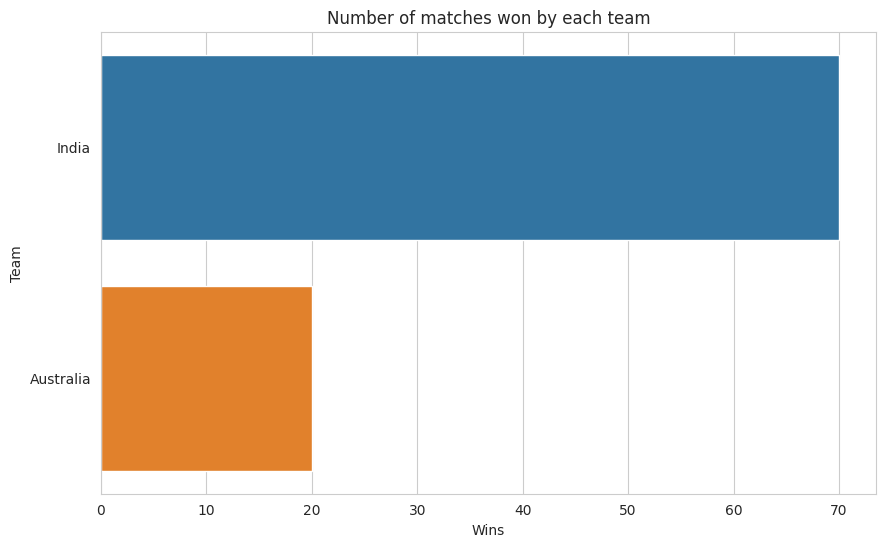

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Winner', data=df, order=df['Winner'].value_counts().index)
plt.xlabel('Wins')
plt.ylabel('Team')
plt.title('Number of matches won by each team')

# Data Analysis
## CORR HeatMap

<ipython-input-10-509a86891e8a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

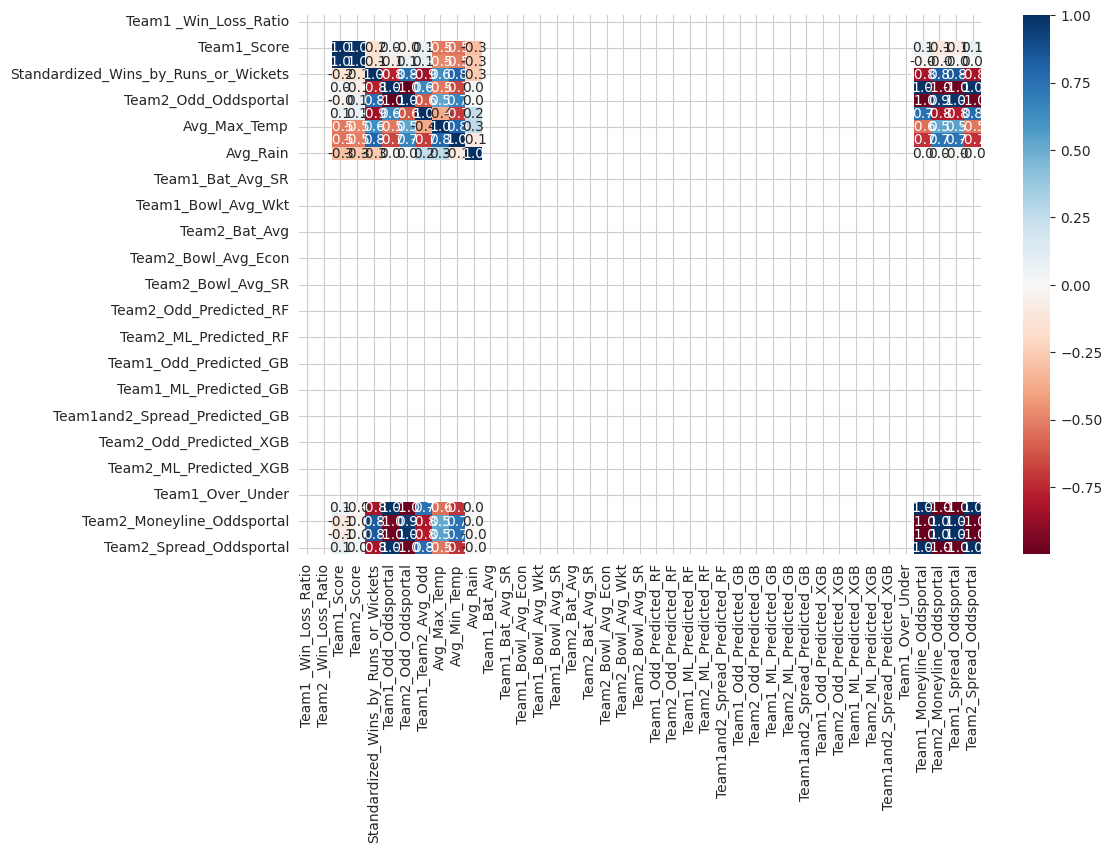

In [10]:
# simple corr, w/o values
corr = df.corr()
#sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

# colormap to a divergent
#sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1, cmap="RdBu")

# include values and plot
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

## PCA to analze for dimentionality

In [11]:
df.columns

Index(['Team1', 'Team2', 'Date_of_Game', 'Month', 'Location',
       'Location_Country', 'Team1_Win_Loss_Status', 'Team2_Win_Loss_Status',
       'Team1 _Win_Loss_Ratio', 'Team2 _Win_Loss_Ratio', 'Format',
       'Team1_Score', 'Team2_Score', 'Winner',
       'Standardized_Wins_by_Runs_or_Wickets', 'Team1_Odd_Oddsportal',
       'Team2_Odd_Oddsportal', 'Team1_Team2_Avg_Odd', 'Avg_Max_Temp',
       'Avg_Min_Temp', 'Avg_Rain', 'Team1_Bat_Avg', 'Team1_Bat_Avg_SR',
       'Team1_Bowl_Avg_Econ', 'Team1_Bowl_Avg_Wkt', 'Team1_Bowl_Avg_SR',
       'Team2_Bat_Avg', 'Team2_Bat_Avg_SR', 'Team2_Bowl_Avg_Econ',
       'Team2_Bowl_Avg_Wkt', 'Team2_Bowl_Avg_SR', 'Team1_Odd_Predicted_RF',
       'Team2_Odd_Predicted_RF', 'Team1_ML_Predicted_RF',
       'Team2_ML_Predicted_RF', 'Team1and2_Spread_Predicted_RF',
       'Team1_Odd_Predicted_GB', 'Team2_Odd_Predicted_GB',
       'Team1_ML_Predicted_GB', 'Team2_ML_Predicted_GB',
       'Team1and2_Spread_Predicted_GB', 'Team1_Odd_Predicted_XGB',
       'Team

## A2 Data Preparation
### Encoding may be necessary for all Object type features of the dataframe

In [12]:
encoder = LabelEncoder()

# Date_of_Game
df['Date_of_Game_Encoded'] = encoder.fit_transform(df['Date_of_Game'])
#df[['Date_of_Game', "Date_of_Game_Encoded"]].sample(5)

# Month
df['Month_Encoded'] = encoder.fit_transform(df['Month'])

# Location
df['Location_Encoded'] = encoder.fit_transform(df['Location'])

# Location_Country
#df['Location_Country_Encoded'] = encoder.fit_transform(df['Location_Country'])

# Team1_Win_Loss_Status
df['Team1_Win_Loss_Status_Encoded'] = encoder.fit_transform(df['Team1_Win_Loss_Status'])

# Team2_Win_Loss_Status
df['Team2_Win_Loss_Status_Encoded'] = encoder.fit_transform(df['Team2_Win_Loss_Status'])

# Format
df['Format_Encoded'] = encoder.fit_transform(df['Format'])

# Winner
df['Winner_Encoded'] = encoder.fit_transform(df['Winner'])

In [13]:
# Team1 & Team2, manual encoding
# India, England, Australia, South Africa, New Zealand, Pakistan, Bangladesh, Sri Lanka as 1 through 8, in order
#df = pd.get_dummies(df, columns=["Team1", "Team2"], drop_first=True)

ind = 1
eng = 2
aus = 3
saf = 4
nzd = 5
pak = 6
bgl = 7
slk = 8

df.loc[df['Team1'] == "India", 'Team1_Encoded'] = ind
df.loc[df['Team1'] == "England", 'Team1_Encoded'] = eng
df.loc[df['Team1'] == "Australia", 'Team1_Encoded'] = aus
df.loc[df['Team1'] == "South Africa", 'Team1_Encoded'] = saf
df.loc[df['Team1'] == "New Zealand", 'Team1_Encoded'] = nzd
df.loc[df['Team1'] == "Pakistan", 'Team1_Encoded'] = pak
df.loc[df['Team1'] == "Bangladesh", 'Team1_Encoded'] = bgl
df.loc[df['Team1'] == "Sri Lanka", 'Team1_Encoded'] = slk

df.loc[df['Team2'] == "India", 'Team2_Encoded'] = ind
df.loc[df['Team2'] == "England", 'Team2_Encoded'] = eng
df.loc[df['Team2'] == "Australia", 'Team2_Encoded'] = aus
df.loc[df['Team2'] == "South Africa", 'Team2_Encoded'] = saf
df.loc[df['Team2'] == "New Zealand", 'Team2_Encoded'] = nzd
df.loc[df['Team2'] == "Pakistan", 'Team2_Encoded'] = pak
df.loc[df['Team2'] == "Bangladesh", 'Team2_Encoded'] = bgl
df.loc[df['Team2'] == "Sri Lanka", 'Team2_Encoded'] = slk

df.loc[df['Winner'] == "India", 'Winner_Encoded'] = ind
df.loc[df['Winner'] == "England", 'Winner_Encoded'] = eng
df.loc[df['Winner'] == "Australia", 'Winner_Encoded'] = aus
df.loc[df['Winner'] == "South Africa", 'Winner_Encoded'] = saf
df.loc[df['Winner'] == "New Zealand", 'Winner_Encoded'] = nzd
df.loc[df['Winner'] == "Pakistan", 'Winner_Encoded'] = pak
df.loc[df['Winner'] == "Bangladesh", 'Winner_Encoded'] = bgl
df.loc[df['Winner'] == "Sri Lanka", 'Winner_Encoded'] = slk

df.loc[df['Location_Country'] == "India", 'Location_Country_Encoded'] = ind
df.loc[df['Location_Country'] == "England", 'Location_Country_Encoded'] = eng
df.loc[df['Location_Country'] == "Australia", 'Location_Country_Encoded'] = aus
df.loc[df['Location_Country'] == "South Africa", 'Location_Country_Encoded'] = saf
df.loc[df['Location_Country'] == "New Zealand", 'Location_Country_Encoded'] = nzd
df.loc[df['Location_Country'] == "Pakistan", 'Location_Country_Encoded'] = pak
df.loc[df['Location_Country'] == "Bangladesh", 'Location_Country_Encoded'] = bgl
df.loc[df['Location_Country'] == "Sri Lanka", 'Location_Country_Encoded'] = slk

df['Team1_Encoded'] = df['Team1_Encoded'].astype(int)
df['Team2_Encoded'] = df['Team2_Encoded'].astype(int)
df['Winner_Encoded'] = df['Winner_Encoded'].astype(int)
df['Location_Country_Encoded'] = df['Winner_Encoded'].astype(int)

In [14]:
## Backup and drop the non int/float fields
 # restore if needed for debugging
#df = df_before_modeling
print(df.columns)
df_before_modeling = df

Index(['Team1', 'Team2', 'Date_of_Game', 'Month', 'Location',
       'Location_Country', 'Team1_Win_Loss_Status', 'Team2_Win_Loss_Status',
       'Team1 _Win_Loss_Ratio', 'Team2 _Win_Loss_Ratio', 'Format',
       'Team1_Score', 'Team2_Score', 'Winner',
       'Standardized_Wins_by_Runs_or_Wickets', 'Team1_Odd_Oddsportal',
       'Team2_Odd_Oddsportal', 'Team1_Team2_Avg_Odd', 'Avg_Max_Temp',
       'Avg_Min_Temp', 'Avg_Rain', 'Team1_Bat_Avg', 'Team1_Bat_Avg_SR',
       'Team1_Bowl_Avg_Econ', 'Team1_Bowl_Avg_Wkt', 'Team1_Bowl_Avg_SR',
       'Team2_Bat_Avg', 'Team2_Bat_Avg_SR', 'Team2_Bowl_Avg_Econ',
       'Team2_Bowl_Avg_Wkt', 'Team2_Bowl_Avg_SR', 'Team1_Odd_Predicted_RF',
       'Team2_Odd_Predicted_RF', 'Team1_ML_Predicted_RF',
       'Team2_ML_Predicted_RF', 'Team1and2_Spread_Predicted_RF',
       'Team1_Odd_Predicted_GB', 'Team2_Odd_Predicted_GB',
       'Team1_ML_Predicted_GB', 'Team2_ML_Predicted_GB',
       'Team1and2_Spread_Predicted_GB', 'Team1_Odd_Predicted_XGB',
       'Team

In [15]:
# 'Team1', 'Team2', 'Date_of_Game', 'Month', 'Location', 'Location_Country', 'Team1_Win_Loss_Status', 'Team2_Win_Loss_Status',
# 'Team1 _Win_Loss_Ratio', 'Team2 _Win_Loss_Ratio', 'Format', 'Team1_Score', 'Team2_Score', 'Winner', 'Standardized_Wins_by_Runs_or_Wickets',
# 'Team1_Odd_Oddsportal', 'Team2_Odd_Oddsportal', 'Team1_Team2_Avg_Odd', 'Avg_Max_Temp', 'Avg_Min_Temp', 'Avg_Rain',
# 'Team1_Moneyline_Oddsportal', 'Team2_Moneyline_Oddsportal', 'Team1_Spread_Oddsportal', 'Team2_Spread_Oddsportal'

#drop = ["Team1", "Team2", "Date_of_Game", "Month", "Location", "Location_Country", "Team1_Win_Loss_Status", "Team2_Win_Loss_Status", "Format", "Winner"]
#drop_pca1 = ["Team1", "Team2", 'Date_of_Game', 'Month', 'Location', 'Location_Country', 'Team1_Win_Loss_Status', 'Team2_Win_Loss_Status', 'Team1 _Win_Loss_Ratio', 'Team2 _Win_Loss_Ratio']
#drop_pca1 = ["Team1", "Team2", 'Date_of_Game', 'Month', 'Location', 'Location_Country', 'Team1_Win_Loss_Status', 'Team2_Win_Loss_Status']
#drop_pca2 = ['Format', 'Winner', 'Team1_Score', 'Team2_Score', 'Standardized_Wins_by_Runs_or_Wickets', 'Team1_Odd_Oddsportal', 'Team2_Odd_Oddsportal']
#drop_pca3 = ['Team1_Team2_Avg_Odd', 'Team1_Moneyline_Oddsportal', 'Team2_Moneyline_Oddsportal', 'Team1_Spread_Oddsportal', 'Team2_Spread_Oddsportal']
#drop_encoded = ['Date_of_Game_Encoded', 'Team1_Win_Loss_Status_Encoded', 'Team2_Win_Loss_Status_Encoded', 'Format_Encoded', 'Location_Country_Encoded']

#drop_pca1 = ["Team1", "Team2", 'Date_of_Game', 'Month', 'Location', 'Location_Country', 'Team1_Win_Loss_Status', 'Team2_Win_Loss_Status', 'Team1 _Win_Loss_Ratio', 'Team2 _Win_Loss_Ratio']
drop_pca1 = ["Team1", "Team2", 'Date_of_Game', 'Month', 'Location', 'Location_Country', 'Team1_Win_Loss_Status', 'Team2_Win_Loss_Status']

drop_pca2 = ['Format', 'Team1_Odd_Oddsportal', 'Team2_Odd_Oddsportal']
#drop_pca2 = ['Format', 'Team1_Score', 'Team2_Score', 'Standardized_Wins_by_Runs_or_Wickets', 'Team1_Odd_Oddsportal', 'Team2_Odd_Oddsportal']
#drop_pca2 = ['Format', 'Winner', 'Team1_Score', 'Team2_Score', 'Standardized_Wins_by_Runs_or_Wickets', 'Team1_Odd_Oddsportal', 'Team2_Odd_Oddsportal']

drop_pca3 = ['Team1_Team2_Avg_Odd', 'Team1_Moneyline_Oddsportal', 'Team2_Moneyline_Oddsportal', 'Team1_Spread_Oddsportal', 'Team2_Spread_Oddsportal']

drop_encoded = ['Date_of_Game_Encoded', 'Month_Encoded', 'Team1_Win_Loss_Status_Encoded', 'Team2_Win_Loss_Status_Encoded', 'Format_Encoded',
                'Location_Encoded', 'Location_Country_Encoded', 'Winner_Encoded']
#drop_encoded = ['Date_of_Game_Encoded', 'Team1_Win_Loss_Status_Encoded', 'Team2_Win_Loss_Status_Encoded', 'Format_Encoded', 'Location_Country_Encoded']

#drop_pred = ['Team1_Odd_Predicted_RF', 'Team2_Odd_Predicted_RF', 'Team1_Odd_Predicted_GB', 'Team2_Odd_Predicted_GB', 'Team1_Odd_Predicted_XGB',
#       'Team2_Odd_Predicted_XGB', 'Team1_ML_Predicted_RF', 'Team2_ML_Predicted_RF', 'Team1_ML_Predicted_GB', 'Team2_ML_Predicted_GB',
#       'Team1_ML_Predicted_XGB', 'Team2_ML_Predicted_XGB', 'Team1_Spread_Predicted_RF', 'Team2_Spread_Predicted_RF',
#      'Team1_Spread_Predicted_GB', 'Team2_Spread_Predicted_GB', 'Team1_Spread_Predicted_XGB', 'Team2_Spread_Predicted_XGB']
drop_pred = ['Team1_Odd_Predicted_RF', 'Team2_Odd_Predicted_RF', 'Team1_ML_Predicted_RF', 'Team2_ML_Predicted_RF',
       'Team1and2_Spread_Predicted_RF', 'Team1_Odd_Predicted_GB', 'Team2_Odd_Predicted_GB', 'Team1_ML_Predicted_GB',
       'Team2_ML_Predicted_GB', 'Team1and2_Spread_Predicted_GB', 'Team1_Odd_Predicted_XGB', 'Team2_Odd_Predicted_XGB',
       'Team1_ML_Predicted_XGB', 'Team2_ML_Predicted_XGB', 'Team1and2_Spread_Predicted_XGB', 'Team1_Over_Under']

#drop_tmp = ['Team1_Win_Loss_Ratio', 'Team2_Win_Loss_Ratio',  'Team1_Score', 'Team2_Score', 'Standardized_Wins_by_Runs_or_Wickets']
drop_tmp = ['Team1_Score', 'Team2_Score', 'Standardized_Wins_by_Runs_or_Wickets']

#df = df.drop(drop, axis=1)
df = df.drop(drop_pca1, axis=1)
df = df.drop(drop_pca2, axis=1)
df = df.drop(drop_pca3, axis=1)
df = df.drop(drop_encoded, axis=1)
df = df.drop(drop_pred, axis=1)
df = df.drop(drop_tmp, axis=1)

y = df["Winner"]
drop = ['Winner']
df = df.drop(drop, axis=1)

In [16]:
#print(df)
#print(y)
#df.isnull()

In [17]:
# Standardize the data
#X = df.values
#print(len(X))
#X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Perform PCA
#pca = PCA(n_components=15)
pcs = PCA()
pcs.fit(df)
pcs_sum = pd.DataFrame({'SD': np.sqrt(pcs.explained_variance_), 'Var Proportion': pcs.explained_variance_ratio_, 'Cumu Proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcs_sum = pcs_sum.transpose()
pcs_sum.columns = ['PC{}'.format(i) for i in range(1, len(pcs_sum.columns) + 1)]
pcs_sum.round(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
SD,91.01,5.37,1.51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Var Proportion,1.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cumu Proportion,1.00,1.00,1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [18]:
pcs_comp = pd.DataFrame(pcs.components_.transpose(), columns=pcs_sum.columns, index=df.columns)
#pcs_comp.iloc[:, :10]
pcs_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
Team1 _Win_Loss_Ratio,4.336726e-19,4.519107e-20,-1.125107e-19,-6.183004e-03,-2.784438e-02,-1.265448e-03,-3.427871e-01,9.389791e-01,-3.033402e-13,5.489178e-17,-2.203539e-29,-1.576835e-32,-1.238618e-45,-1.933281e-49,-0.000000e+00,0.0,0.0
Team2 _Win_Loss_Ratio,-3.330669e-16,1.734723e-16,-1.401657e-15,-1.995482e-03,9.996106e-01,-3.523495e-05,-9.544514e-03,2.614479e-02,-8.386378e-15,1.537639e-18,7.862541e-19,2.733950e-20,2.115845e-22,-3.530560e-18,7.535276e-34,0.0,0.0
Avg_Max_Temp,1.147865e-02,6.841068e-01,7.292915e-01,5.542442e-16,8.127179e-16,-4.084973e-17,-7.331917e-18,2.724058e-17,7.397878e-17,-8.009614e-21,-2.777966e-17,7.069423e-21,-1.626397e-24,-4.398804e-20,-2.382125e-35,0.0,0.0
Avg_Min_Temp,-4.093821e-03,7.293656e-01,-6.841119e-01,-6.175616e-16,-1.075529e-15,4.796578e-17,6.667843e-18,-3.198396e-17,-3.897661e-17,1.395291e-20,1.423269e-18,-1.564761e-21,-8.980363e-24,1.925946e-19,-2.114715e-35,0.0,0.0
Avg_Rain,9.999257e-01,-4.867090e-03,-1.117274e-02,1.665335e-16,-1.110223e-16,1.172294e-17,-7.806256e-18,-0.000000e+00,7.040402e-18,-1.050491e-21,9.255447e-18,-5.504756e-21,-1.562882e-22,-4.580636e-19,-5.895044e-34,0.0,0.0
Team1_Bat_Avg,-0.000000e+00,8.673617e-18,-7.372575e-17,9.947085e-02,1.812976e-04,2.019259e-02,-9.347321e-01,-3.405491e-01,1.866331e-14,-1.189053e-16,-2.002726e-19,-3.522195e-21,-1.370829e-23,-3.433580e-18,8.580580e-34,0.0,0.0
Team1_Bat_Avg_SR,-0.000000e+00,6.938894e-17,-5.898060e-16,7.957668e-01,1.450381e-03,1.615407e-01,7.605326e-02,3.326497e-02,5.777258e-01,-1.071901e-04,-1.756559e-17,1.273399e-20,-1.273468e-22,6.474375e-20,-1.867919e-34,0.0,0.0
Team1_Bowl_Avg_Econ,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,-1.855380e-04,-1.000000e+00,-2.858824e-15,7.886216e-17,-5.169769e-23,-6.496874e-19,6.965525e-34,0.0,0.0
Team1_Bowl_Avg_Wkt,-0.000000e+00,3.469447e-17,-2.949030e-16,3.978834e-01,7.251904e-04,8.077036e-02,3.802663e-02,1.663249e-02,-5.765996e-01,1.069811e-04,-7.077956e-01,-1.865417e-04,-6.748299e-17,6.504344e-18,1.278878e-33,0.0,0.0
Team1_Bowl_Avg_SR,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,2.220446e-16,-2.635530e-04,1.000000e+00,1.493826e-16,1.305673e-17,9.227178e-34,0.0,0.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Team1 _Win_Loss_Ratio  90 non-null     float64
 1   Team2 _Win_Loss_Ratio  90 non-null     float64
 2   Avg_Max_Temp           90 non-null     float64
 3   Avg_Min_Temp           90 non-null     float64
 4   Avg_Rain               90 non-null     float64
 5   Team1_Bat_Avg          90 non-null     float64
 6   Team1_Bat_Avg_SR       90 non-null     float64
 7   Team1_Bowl_Avg_Econ    90 non-null     float64
 8   Team1_Bowl_Avg_Wkt     90 non-null     float64
 9   Team1_Bowl_Avg_SR      90 non-null     float64
 10  Team2_Bat_Avg          90 non-null     float64
 11  Team2_Bat_Avg_SR       90 non-null     float64
 12  Team2_Bowl_Avg_Econ    90 non-null     float64
 13  Team2_Bowl_Avg_Wkt     90 non-null     float64
 14  Team2_Bowl_Avg_SR      90 non-null     float64
 15  Team1_En

In [20]:
df.sample(10)
#df.size

,Team1 _Win_Loss_Ratio,Team2 _Win_Loss_Ratio,Avg_Max_Temp,Avg_Min_Temp,Avg_Rain,Team1_Bat_Avg,Team1_Bat_Avg_SR,Team1_Bowl_Avg_Econ,Team1_Bowl_Avg_Wkt,Team1_Bowl_Avg_SR,Team2_Bat_Avg,Team2_Bat_Avg_SR,Team2_Bowl_Avg_Econ,Team2_Bowl_Avg_Wkt,Team2_Bowl_Avg_SR,Team1_Encoded,Team2_Encoded
67,0.778,0.222,32.8,20.6,258.8,29.21625,82.43625,5.4225,40.535,43.995,27.727333,92.177333,5.772308,39.890769,41.563846,1,3
23,0.778,0.222,36.9,27.0,4.6,29.21625,82.43625,5.4225,40.535,43.995,27.727333,92.177333,5.772308,39.890769,41.563846,1,3
78,0.778,0.222,28.1,18.6,124.8,29.21625,82.43625,5.4225,40.535,43.995,27.727333,92.177333,5.772308,39.890769,41.563846,1,3
45,0.778,0.222,28.4,24.6,10.6,29.21625,82.43625,5.4225,40.535,43.995,27.727333,92.177333,5.772308,39.890769,41.563846,1,3
27,0.778,0.222,28.4,24.6,10.6,29.21625,82.43625,5.4225,40.535,43.995,27.727333,92.177333,5.772308,39.890769,41.563846,1,3
35,0.778,0.222,28.1,18.6,124.8,29.21625,82.43625,5.4225,40.535,43.995,27.727333,92.177333,5.772308,39.890769,41.563846,1,3
33,0.778,0.222,28.1,18.6,124.8,29.21625,82.43625,5.4225,40.535,43.995,27.727333,92.177333,5.772308,39.890769,41.563846,1,3
24,0.778,0.222,28.1,18.6,124.8,29.21625,82.43625,5.4225,40.535,43.995,27.727333,92.177333,5.772308,39.890769,41.563846,1,3
18,0.778,0.222,28.4,24.6,10.6,29.21625,82.43625,5.4225,40.535,43.995,27.727333,92.177333,5.772308,39.890769,41.563846,1,3
75,0.778,0.222,34.8,27.6,249.6,29.21625,82.43625,5.4225,40.535,43.995,27.727333,92.177333,5.772308,39.890769,41.563846,1,3


In [21]:
feat_arrange = ['Team1_Encoded', 'Team2_Encoded', 'Team1 _Win_Loss_Ratio',  'Team2 _Win_Loss_Ratio',  'Team1_Bat_Avg',  'Team1_Bat_Avg_SR',
  'Team1_Bowl_Avg_Econ',  'Team1_Bowl_Avg_Wkt',  'Team1_Bowl_Avg_SR',  'Team2_Bat_Avg',  'Team2_Bat_Avg_SR',  'Team2_Bowl_Avg_Econ',
  'Team2_Bowl_Avg_Wkt',  'Team2_Bowl_Avg_SR',  'Avg_Max_Temp',  'Avg_Min_Temp',  'Avg_Rain',]

# redo the columns
df = df.reindex(columns=feat_arrange)
df.columns

Index(['Team1_Encoded', 'Team2_Encoded', 'Team1 _Win_Loss_Ratio',
       'Team2 _Win_Loss_Ratio', 'Team1_Bat_Avg', 'Team1_Bat_Avg_SR',
       'Team1_Bowl_Avg_Econ', 'Team1_Bowl_Avg_Wkt', 'Team1_Bowl_Avg_SR',
       'Team2_Bat_Avg', 'Team2_Bat_Avg_SR', 'Team2_Bowl_Avg_Econ',
       'Team2_Bowl_Avg_Wkt', 'Team2_Bowl_Avg_SR', 'Avg_Max_Temp',
       'Avg_Min_Temp', 'Avg_Rain'],
      dtype='object')

## A3 Data Modeling

## A3i Team winning Odds

## A3i.a Team winning Odds - Setup DV & IDV

to remove:
UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names

X = X.values
y = y.values

After this do the train test split,

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [22]:
#print(y)

In [23]:
X = df
X = X.values
y = y.values

# encode y
y = encoder.fit_transform(y)
# didnt work got error: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5 6 7], got [1 2 3 4 5 6 7 8]
# use this
#y_train_xgb = y_train.map({"1": 0, "2": 1, "3": 2, "4": 3, "5": 4, "6": 5, "7": 6, "8": 7})

#y = y.assign(**df[['Team1_Encoded', 'Team2_Encoded']])
# or use the following

#y1 = pd.DataFrame()
#y1["Team1_Odd_Oddsportal"] = df["Team1_Odd_Oddsportal"]
#drop = ['Team1_Odd_Oddsportal']
#df = df.drop(drop, axis=1)

#y2 = pd.DataFrame()
#y2["Team2_Odd_Oddsportal"] = df["Team2_Odd_Oddsportal"]
#drop = ['Team2_Odd_Oddsportal']
#df = df.drop(drop, axis=1)

# Split the data into training and testing sets
#x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=0)
#x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

# Scale the data using StandardScaler
scaler = StandardScaler()
#y_train_scaled = scaler.fit_transform(y_train)
#y_test_Scaled = scaler.fit_transform(y_test)
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [24]:
print(y)

[1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1
 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1
 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1]


In [25]:
#x_train
#y_train

#print(x_test)
#x_test.sample(5)
#x_test.columns
#x_test.info()

#print(y_test)
#y_test.info()

## A3i.b Team winning Odds - Create Models

In [26]:
# Random Forest Classifier
#####################################################
#model_rf = RandomForestClassifier(n_estimators=100, min_samples_split=3, max_features="auto")
model_rf = RandomForestClassifier(n_estimators=100, min_samples_split=3, max_features=100)
#model_rf.fit(x_train, y_train.values)
model_rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_test)
# Predict
predictions = model_rf.predict(x_test)
probabilities = model_rf.predict_proba(x_test)[:, 1]
#ac_rf = accuracy_score(y_pred_rf, y_test)
#print("Random Forest Accuracy:", ac_rf)
# Evaluate
accuracy = accuracy_score(y_test, predictions)

# Output results
print(f"Model Accuracy: {accuracy}")
print("Winning Probabilities:", probabilities)

# Logistic Regression
#####################################################
model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_lr.fit(x_train_scaled, y_train)
#model_lr.fit(x_train, y_train)
y_pred_lr = model_lr.predict(x_test_scaled)
#y_pred_lr = model_lr.predict(x_test)
ac_lr = accuracy_score(y_pred_lr, y_test)
print("Logistic Regression Accuracy:", ac_lr)

# Decision Tree Classifier
#####################################################
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(x_train, y_train)
y_pred_dt = model_dt.predict(x_test)
ac_dt = accuracy_score(y_pred_dt, y_test)
print("Decision Tree Accuracy:", ac_dt)

# Gradient Boosting Classifier
#####################################################
model_gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
model_gb.fit(x_train, y_train)
y_pred_gb = model_gb.predict(x_test)
ac_gb = accuracy_score(y_pred_gb, y_test)
print("Gradient Boosting Accuracy:", ac_gb)

# XGBoost Classifier
#####################################################
#start_time = time.time()
#model_xgb = XGBClassifier(random_state=42)
model_xgb = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
model_xgb.fit(x_train, y_train)
#print('Fit time : ', time.time() - start_time)
y_pred_xgb = model_xgb.predict(x_test)
ac_xgb = accuracy_score(y_pred_xgb, y_test)
print("XGBoost Accuracy:", ac_xgb)

# Gradient Boosting Regressor
#####################################################
# Initialize and train the regressor
model_gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
model_gbr.fit(x_train_scaled, y_train)
#model_gbr.fit(x_train, y_train.values.ravel())

# Predict probabilities on the test set
y_pred_gbr = model_gbr.predict(x_test_scaled)

# Calculate the R² score
r2 = r2_score(y_test, y_pred_gbr)

# Print the R² score
print(f'Gradient Boosting Regressor r-square: {r2:.2f}')

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred_gbr)
print(f"Gradient Boosting Regressor mse of test set: {mse}")
#print(y_pred)
#print(len(y_pred))

# Define the LSTM model
#####################################################
model_lstm = tf.keras.Sequential([
    layers.LSTM(64, return_sequences=True, input_shape=(x_train_scaled.shape[1], 1)),
    layers.LSTM(32),
    layers.Dense(1)
])

# Compile the model
#model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.compile('adam', 'binary_crossentropy', metrics='accuracy')

# Train the model
model_lstm.fit(x_train_scaled, y_train, epochs=10, batch_size=16)

# Evaluate the model on the test set
loss, mse = model_lstm.evaluate(x_test_scaled, y_test)
print('Mean Squared Error:', mse)

# Make predictions on the test set
y_pred_lstm = model_lstm.predict(x_test_scaled)

# Define the encoder and decoder
#####################################################
# Define the dimension of the input features and the encoding
input_dim = x_train_scaled.shape[1]  # Number of features
encoding_dim = 32  # This is the size of our encoded representations

# Input layer
input_layer = Input(shape=(input_dim,))

# Encoder
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Regression prediction layer based on encoded features
regression_output = Dense(1, activation='linear')(encoded)  # Output layer for regression

# Complete model
autoencoder = Model(input_layer, regression_output)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model
autoencoder.summary()

# Training the model
history = autoencoder.fit(x_train_scaled, y_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test_scaled, y_test))

# Make predictions on the test set
y_pred_enc = autoencoder.predict(x_test_scaled)

# Calculate the mean squared error (MSE)
mse = tf.keras.losses.MeanSquaredError()
mse_value = mse(y_test, y_pred_enc).numpy()

# Calculate the mean absolute error (MAE)
mae = tf.keras.losses.MeanAbsoluteError()
mae_value = mae(y_test, y_pred_enc).numpy()

# Calculate the root mean squared error (RMSE)
rmse_value = np.sqrt(mse_value)

# For R-squared, we can use the r2_score function from sklearn.metrics
#from sklearn.metrics import r2_score
r2_value = r2_score(y_test, y_pred_enc)

# Print the metrics
print(f'Auto Encoder Mean Squared Error (MSE): {mse_value}')
print(f'Auto Encoder Mean Absolute Error (MAE): {mae_value}')
print(f'Auto Encoder Root Mean Squared Error (RMSE): {rmse_value}')
print(f'Auto Encoder R-squared : {r2_value}')


Model Accuracy: 0.8148148148148148
Winning Probabilities: [1.        0.        0.6885144 1.        1.        1.        1.
 0.6885144 0.6885144 0.6885144 0.6885144 0.6885144 0.6885144 1.
 0.6885144 0.6885144 0.6885144 1.        1.        0.6885144 0.
 0.6885144 0.6885144 1.        0.6885144 1.        1.       ]
Logistic Regression Accuracy: 0.8148148148148148
Decision Tree Accuracy: 0.8148148148148148
Gradient Boosting Accuracy: 0.8148148148148148
XGBoost Accuracy: 0.8148148148148148
Gradient Boosting Regressor r-square: 0.37
Gradient Boosting Regressor mse of test set: 0.12008114910083255
Epoch 1/10
4/4 [==============================] - 8s 34ms/step - loss: 4.2365 - accuracy: 0.2063
Epoch 2/10
4/4 [==============================] - 0s 27ms/step - loss: 1.9851 - accuracy: 0.2063
Epoch 3/10
4/4 [==============================] - 0s 26ms/step - loss: 1.6803 - accuracy: 0.2063
Epoch 4/10
4/4 [==============================] - 0s 30ms/step - loss: 1.4837 - accuracy: 0.2063
Epoch 5/10
4/4 [

## A3i.c Team winning Odds - Caculate Odds & Moneyline:

In [27]:
pred_url_csv = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRhaWdmjg3BKWlDKMgN2M4QrzGM20PGZ2_z0norCz4-LOhnLaN-OivLNjNYmmarcMmhhPFCiASinhZI/pub?output=csv"
x_team1_2 = pd.read_csv(pred_url_csv)
x_team1_2 = x_team1_2.values
print(x_team1_2)

[[ 0.778       0.222      24.8        17.2         0.3        29.21625
  82.43625     5.4225     40.535      43.995      27.72733333 92.17733333
   5.77230769 39.89076923 41.56384615  1.          3.        ]]


In [28]:
# American Odds
def probability_to_american_odds(probability):
    if probability < 0 or probability > 1:
        raise ValueError("Probability must be between 0 and 1.")

    if probability == 0.5:  # Edge case where the odds would be infinite
        return "EVEN"

    if probability > 0.5:
        odds = -100 / (probability - 1)
    else:
        odds = 100 / (1 - probability)

    # Formatting to return a nice string representation
    if odds > 0:
        return f'+{int(odds)}'
    else:
        return f'{int(odds)}'

    if odds == 0:
        return f'+{int(11)}'

In [29]:
# Moneyline
def american_odds_to_payout(american_odds, bet_amount):
    if american_odds > 0:
        # Positive odds (e.g., +150)
        profit = (american_odds / 100) * bet_amount
    else:
        # Negative odds (e.g., -200)
        profit = bet_amount / (-american_odds / 100)

    # The total payout is the initial bet amount plus the profit
    #total_payout = bet_amount + profit
    total_payout = profit
    return total_payout

In [30]:
#x_team1_2 = np.array([x_team1_2])
#x_team1_2 = np.array([[18.3, 9.6, 61, 29.453333, 88.704667, 5.574545, 33.232727, 35.726364, 24.878750, 76.751250, 5.679167, 34.493333, 38.298333, 8, 4, 5, 8]])
#x_team1_2 = np.array([[18.3, 9.6, 61, 29.453333, 88.704667, 5.574545, 33.232727, 35.726364, 24.878750, 76.751250, 5.679167, 34.493333, 38.298333, 5, 8]])
#y_pred_rf1 = model_rf.predict([[1.125, 0.542, 78, 70, 10.3, 33.8, 28.4, 17.8, 27.72733333, 92.17733333, 5.772307692, 39.89076923, 41.56384615, 21.11625, 78.83125, 5.192727273, 33.17, 38.89909091, 7, 3]])
y_pred_rf1 = model_rf.predict_proba(x_team1_2)
y_pred_rf1

array([[0.0359206, 0.9640794]])

In [31]:
prob1_rf = y_pred_rf1[0][0]
#american_odds1_rf = probability_to_american_odds(prob1_rf)

prob2_rf = y_pred_rf1[0][1]
#american_odds2_rf = probability_to_american_odds(prob2_rf)

print(f"Random Forest - The American odds : {prob1_rf} | {prob2_rf}")
#print(f"Random Forest - The American odds {prob1_rf} | {prob2_rf} : {american_odds1_rf} | {american_odds2_rf}")

Random Forest - The American odds : 0.03592059750534982 | 0.9640794024946502


In [32]:
# probability to American Odds
american_odds1_rf = (100 * prob1_rf) / (1 - prob1_rf)
american_odds2_rf = (100 * prob2_rf) / (1 - prob2_rf)

# bookmakers odd
if (american_odds1_rf > american_odds2_rf):
  american_odds1_rf = -(american_odds1_rf)
  american_odds2_rf = american_odds2_rf + 200
else:
  american_odds2_rf = -(american_odds2_rf)
  american_odds1_rf = american_odds1_rf + 200

#print(f"Random Forest - The American odds  {prob1} | {prob2} : {american_odds1} | {american_odds2}")
print(f"Random Forest - The American odds  {prob1_rf} | {prob2_rf} : {round(int(american_odds1_rf))} | {round(int(american_odds2_rf))}")

# Moneyline
bet_amount = 100  # The amount you are betting
team1_payout_rf = american_odds_to_payout(american_odds1_rf, bet_amount)
team2_payout_rf = american_odds_to_payout(american_odds2_rf, bet_amount)
print(f"Payout for American/moneyline odds with $100 - {american_odds1_rf} | {american_odds2_rf} : ${team1_payout_rf} | {team2_payout_rf}")

# bookmakers spread
#df['Team1_Spread_Oddsportal'] = np.where(df['Team1_Odd_Oddsportal'] < 0, (abs(df['Team1_Odd_Oddsportal'])/(abs(df['Team1_Odd_Oddsportal']) + 100))*100, 100/(df['Team1_Odd_Oddsportal'] + 100) * 100)
#df['Team2_Spread_Oddsportal'] = np.where(df['Team2_Odd_Oddsportal'] < 0,  (abs(df['Team2_Odd_Oddsportal'])/(abs(df['Team2_Odd_Oddsportal']) + 100))*100, 100/(df['Team2_Odd_Oddsportal'] + 100) * 100)

team1_spread_rf = ( abs(american_odds1_rf) / (abs(american_odds1_rf)) + 100) if american_odds1_rf < 1 else (100 / (american_odds1_rf + 100)) * 100
team2_spread_rf = ( abs(american_odds2_rf) / (abs(american_odds2_rf)) + 100) if american_odds2_rf < 1 else (100 / (american_odds2_rf + 100)) * 100
odd_spread_rf = round(team1_spread_rf - team2_spread_rf)
print(f"Odds Spread between Team1 and 2 : {odd_spread_rf}")

Random Forest - The American odds  0.03592059750534982 | 0.9640794024946502 : 203 | -2683
Payout for American/moneyline odds with $100 - 203.7258961671001 | -2683.91805662772 : $203.7258961671001 | 3.7258961671001107
Odds Spread between Team1 and 2 : -68


In [33]:
#team1_payout_rf = (100 / abs(american_odds1_rf)) * 100 if american_odds1_rf <=1 else (american_odds1_rf/100) * 100
#team2_payout_rf = (100 / abs(american_odds2_rf)) * 100 if american_odds2_rf <=1 else (american_odds2_rf/100) * 100
#print(f"Payout for American/moneyline odds with $100 - {american_odds1_rf} | {american_odds2_rf} : ${team1_payout_rf} | {team2_payout_rf}")

In [34]:
#print(american_odds_to_payout(-370, 100))
#print(american_odds_to_payout(106, 100))
#print(american_odds_to_payout(-312, 100))
#print(american_odds_to_payout(233, 100))

In [35]:
# LR
# Make predictions on the test set
######################################################

#y_pred_lr1 = model_lr.predict_proba(x_team1_2)
y_pred_lr1 = model_lr.predict_proba(x_team1_2)
y_pred_lr1

# Calculate the winning odds for each team
#team1_odds_lr = y_pred_lr1[:, 0]
#team2_odds_lr = 1 - team1_odds_lr

# Print the winning odds for each team
# print the probability of possibilies of all outcomes of y
#print('LR - Team 1 and 2 winning odds:', team1_odds_lr, team2_odds_lr)


array([[1.00000000e+00, 8.68525635e-20]])

In [36]:
y_pred_dt1 = model_dt.predict_proba(x_team1_2)
y_pred_dt1

array([[0., 1.]])

In [37]:
y_pred_gb1 = model_gb.predict_proba(x_team1_2)
y_pred_gb1

array([[9.25835436e-06, 9.99990742e-01]])

In [38]:
prob1_gb = y_pred_gb1[0][0]
#american_odds1_gb = probability_to_american_odds(prob1_gb)

prob2_gb = y_pred_gb1[0][1]
#american_odds2_gb = probability_to_american_odds(prob2_gb)

#print(f"Gradient Boost - The American odds  {prob1_gb} | {prob2_gb} : {american_odds1_gb} | {american_odds2_gb}")

In [39]:
# probability to American Odds
american_odds1_gb = (100 * prob1_gb) / (1 - prob1_gb)
american_odds2_gb = (100 * prob2_gb) / (1 - prob2_gb)

# bookmakers odd
if (american_odds1_gb > american_odds2_gb):
  american_odds1_gb = -(american_odds1_gb)
  american_odds2_gb = american_odds2_gb + 200
else:
  american_odds2_gb = -(american_odds2_gb)
  american_odds1_gb = american_odds1_gb + 200

#print(f"Gradient Boost - The American odds  {prob1} | {prob2} : {american_odds1} | {american_odds2}")
print(f"Gradient Boost - The American odds  {prob1_gb} | {prob2_gb} : {round(int(american_odds1_gb))} | {round(int(american_odds2_gb))}")

# Moneyline
bet_amount = 100  # The amount you are betting
team1_payout_gb = american_odds_to_payout(american_odds1_gb, bet_amount)
team2_payout_gb = american_odds_to_payout(american_odds2_gb, bet_amount)
print(f"Payout for American/moneyline odds with $100 - {american_odds1_gb} | {american_odds2_gb} : ${team1_payout_gb} | {team2_payout_gb}")

team1_spread_gb = ( abs(american_odds1_gb) / (abs(american_odds1_gb)) + 100) if american_odds1_gb < 1 else (100 / (american_odds1_gb + 100)) * 100
team2_spread_gb = ( abs(american_odds2_gb) / (abs(american_odds2_gb)) + 100) if american_odds2_gb < 1 else (100 / (american_odds2_gb + 100)) * 100
odd_spread_gb = round(team1_spread_gb - team2_spread_gb)
print(f"Odds Spread between Team1 and 2 : {odd_spread_gb}")

Gradient Boost - The American odds  9.258354356944665e-06 | 0.999990741645643 : 200 | -10800955
Payout for American/moneyline odds with $100 - 200.0009258440075 | -10800955.581221115 : $200.0009258440075 | 0.000925844007486367
Odds Spread between Team1 and 2 : -68


In [40]:
y_pred_xgb1 = model_xgb.predict_proba(x_team1_2)
y_pred_xgb1

array([[0.0716725, 0.9283275]], dtype=float32)

In [41]:
prob1_xgb = y_pred_xgb1[0][0]
#american_odds1_xgb = probability_to_american_odds(prob1_xgb)

prob2_xgb = y_pred_xgb1[0][1]
#american_odds2_xgb = probability_to_american_odds(prob2_xgb)

#print(f"XG Boost - The American odds  {prob1_xgb} | {prob2_xgb} : {american_odds1_xgb} | {american_odds2_xgb}")

In [42]:
# probability to American Odds
american_odds1_xgb = (100 * prob1_xgb) / (1 - prob1_xgb)
american_odds2_xgb = (100 * prob2_xgb) / (1 - prob2_xgb)


# bookmakers odd
if (american_odds1_xgb > american_odds2_xgb):
  american_odds1_xgb = -(american_odds1_xgb)
  american_odds2_xgb = american_odds2_xgb + 200
else:
  american_odds2_xgb = -(american_odds2_xgb)
  american_odds1_xgb = american_odds1_xgb + 200

print(f"XG Boost - The American odds  {prob1_xgb} | {prob2_xgb} : {round(int(american_odds1_xgb))} | {round(int(american_odds2_xgb))}")
#print(f"XG Boost - The American odds  {prob1} | {prob2} : {american_odds1} | {american_odds2}")

# Moneyline
bet_amount = 100  # The amount you are betting
team1_payout_xgb = american_odds_to_payout(american_odds1_xgb, bet_amount)
team2_payout_xgb = american_odds_to_payout(american_odds2_xgb, bet_amount)
print(f"Payout for American/moneyline odds with $100 - {american_odds1_xgb} | {american_odds2_xgb} : ${team1_payout_xgb} | {team2_payout_xgb}")

# bookmakers spread
team1_spread_xgb = ( abs(american_odds1_xgb) / (abs(american_odds1_xgb)) + 100) if american_odds1_xgb < 1 else (100 / (american_odds1_xgb + 100)) * 100
team2_spread_xgb = ( abs(american_odds2_xgb) / (abs(american_odds2_xgb)) + 100) if american_odds2_xgb < 1 else (100 / (american_odds2_xgb + 100)) * 100
odd_spread_xgb = round(team1_spread_xgb - team2_spread_xgb)
print(f"Odds Spread between Team1 and 2 : {odd_spread_xgb}")

XG Boost - The American odds  0.07167249917984009 | 0.9283275008201599 : 207 | -1295
Payout for American/moneyline odds with $100 - 207.72060497146953 | -1295.235287513566 : $207.72060497146953 | 7.720604971469528
Odds Spread between Team1 and 2 : -69


## A3i.f Team winning Odds - Save models

In [43]:
# Save the model to a file
#model_file = gmodels + "/" + "model_gbb_reg.joblib"
#joblib.dump(model_gbr, model_file)